In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
# Define the common root directory for both train and test data
PROJECT_ROOT = "/content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage"

# Define TRAIN and TEST paths based on the PROJECT_ROOT
TRAIN = os.path.join(PROJECT_ROOT, 'train')
TEST = os.path.join(PROJECT_ROOT, 'test')

# DATA_DIR was previously used, let's keep it consistent by aliasing it to TRAIN
DATA_DIR = TRAIN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential # to give sequence to layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224,224),
    batch_size=32
    # class_names=['healthy1', 'infected1'] # Removed class_names to infer from directories
)

Found 8818 files belonging to 2 classes.
Using 7055 files for training.


In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224,224),
    batch_size=32
    # class_names=['healthy1', 'infected1'] # Removed class_names to infer from directories
)

Found 8818 files belonging to 2 classes.
Using 1763 files for validation.


In [ ]:
import os

# List the contents of the DATA_DIR
try:
    print(f"Contents of {DATA_DIR}:")
    for item in os.listdir(DATA_DIR):
        print(item)
except FileNotFoundError:
    print(f"Error: The directory {DATA_DIR} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of /content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage/train:
healthy
infected


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST,
    seed=42,
    image_size=(224, 224), # Corrected image size
    batch_size=32,
    shuffle=True

)
class_names = train_dataset.class_names
print("Classes:",class_names)

Found 1515 files belonging to 2 classes.
Classes: ['healthy', 'infected']


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST,
    seed=42,
    image_size=(24*24),
    batch_size=32,
    shuffle=True

)
class_names = train_dataset.class_names
print("Classes:",class_names)

Found 1515 files belonging to 2 classes.
Classes: ['healthy', 'infected']


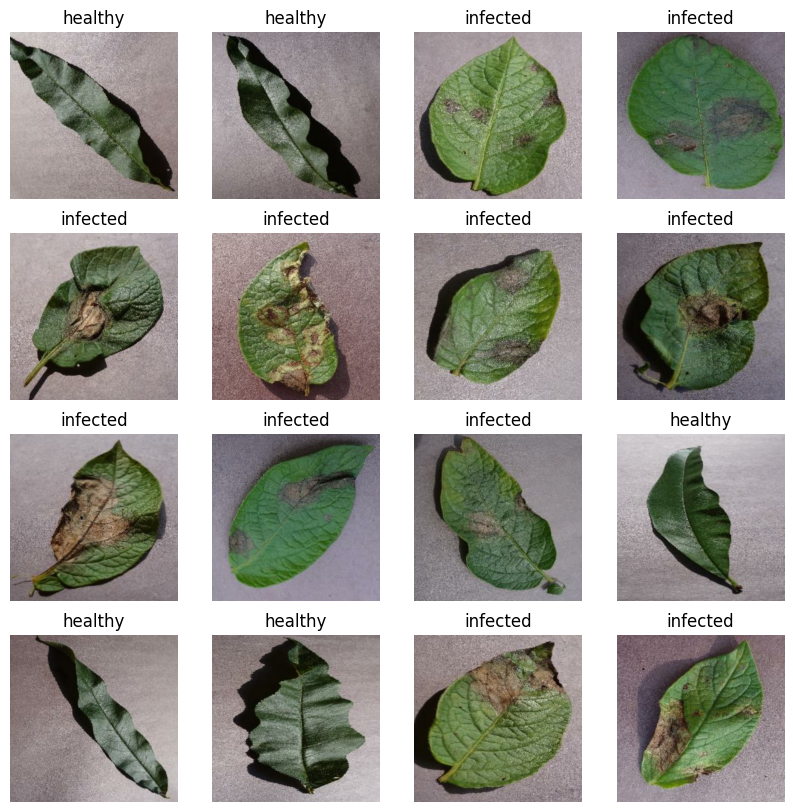

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in test_dataset.take(1):
  for i in range(16):
    x = plt.subplot(4,4,i+1) # Changed from 4,3 to 4,4
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

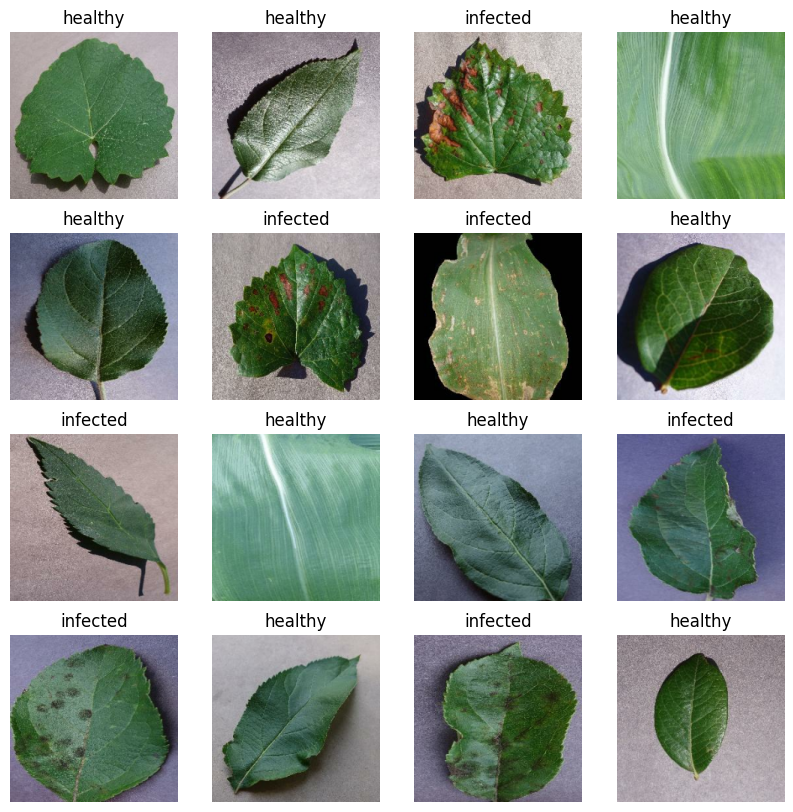

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
  for i in range(16):
    x = plt.subplot(4,4,i+1) # Changed from 4,3 to 4,4
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64, kernel_size=(3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(128, activation='relu'),
Dense(2, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=10,verbose=1)

Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 50s 226ms/step - accuracy: 0.8671 - loss: 0.3128 - val_accuracy: 0.8599 - val_loss: 0.4414
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 145ms/step - accuracy: 0.9411 - loss: 0.1516 - val_accuracy: 0.8491 - val_loss: 0.5691
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 144ms/step - accuracy: 0.9665 - loss: 0.0896 - val_accuracy: 0.8712 - val_loss: 0.5320
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 147ms/step - accuracy: 0.9875 - loss: 0.0449 - val_accuracy: 0.8106 - val_loss: 0.6984
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 143ms/step - accuracy: 0.9612 - loss: 0.1074 - val_accuracy: 0.8537 - val_loss: 0.6603
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.9949 - loss: 0.0271 - val_accuracy: 0.8690 - val_loss: 0.7246
Epoch 7/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.9968 - loss: 0.0209 - val_accuracy: 0.8599 - val_loss: 0.7484
Epoch 8/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.9971 - loss: 0

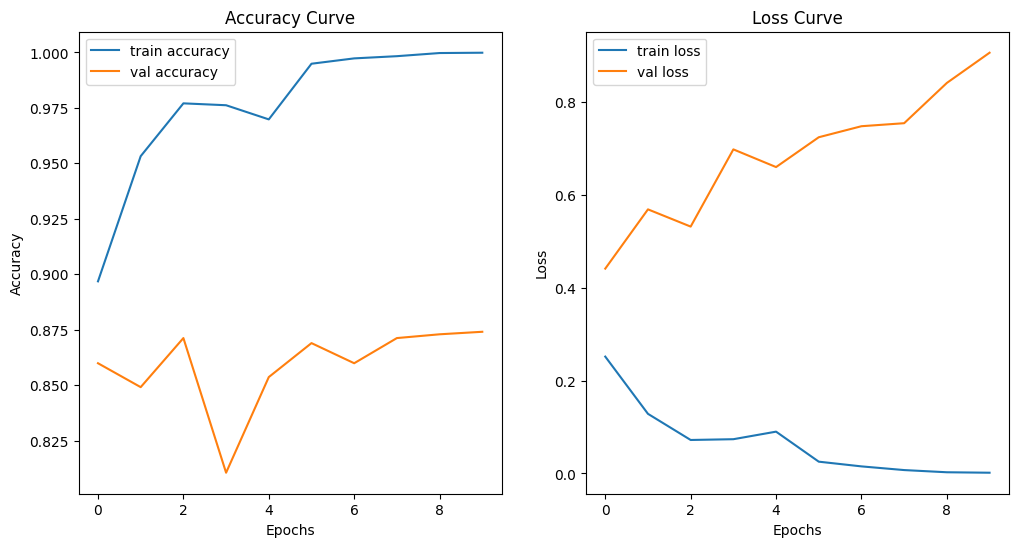

In [ ]:
# Plotting Accuracy and Loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.show()

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST,
    image_size=(224,224),
    batch_size=32,
    shuffle=False,                      #shuffle = false means even after running shells again & again sequence of images remains same
    color_mode='rgb',
    label_mode='int'
    # class_names=['healthy1', 'infected1'] # Removed this line to infer from directories
)

Found 1515 files belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 38s 684ms/step - accuracy: 0.5869 - loss: 6.5780
Test Loss: 5.630555629730225
Test Accuracy: 0.5742574334144592


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step


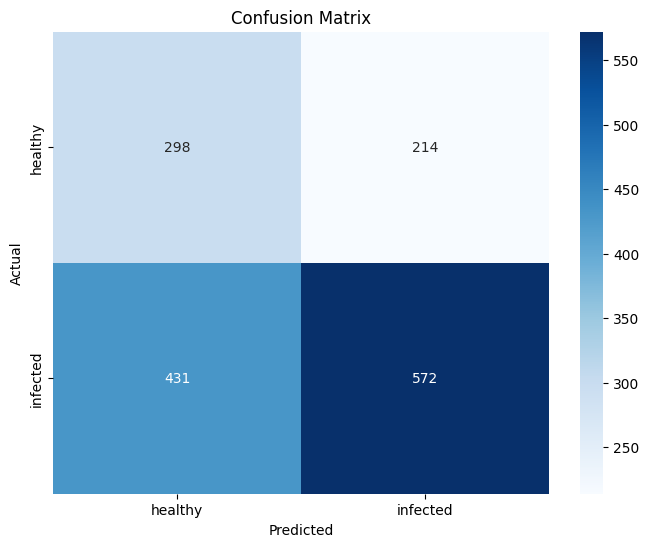

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#predictions on test data
y_pred=model.predict(test_dataset)
y_pred_classes=np.argmax(y_pred,axis=1)
#get true laels from test_dataset
y_true=np.concatenate([y.numpy() for x, y in test_dataset],axis=0)
#confusion matrix
cm=confusion_matrix(y_true,y_pred_classes)
#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
report=classification_report(y_true,y_pred_classes,digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.4088    0.5820    0.4803       512
           1     0.7277    0.5703    0.6395      1003

    accuracy                         0.5743      1515
   macro avg     0.5683    0.5762    0.5599      1515
weighted avg     0.6199    0.5743    0.5857      1515



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual Label: healthy
Predicted Label: healthy


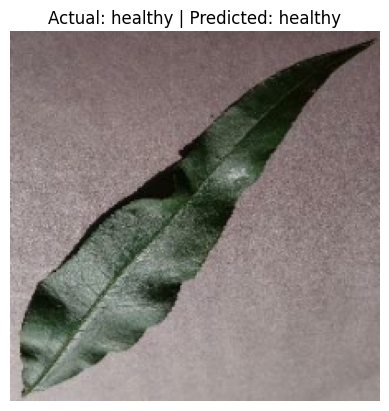

In [ ]:
# Take one batch
for images, labels in test_dataset.take(1):
    # Pick one sample (index = 1 for example)
    Unseen_sample = images[7].numpy()
    actual_label  = labels[9].numpy()

    # Model prediction
    y_prob = model.predict(tf.expand_dims(Unseen_sample, axis=0))  # add batch dimension
    y_pred = np.argmax(y_prob)

    # Print actual vs predicted
    print("Actual Label:", class_names[actual_label])
    print("Predicted Label:", class_names[y_pred])

    # Show the image
    plt.imshow(Unseen_sample.astype("uint8"))
    plt.title(f"Actual: {class_names[actual_label]} | Predicted: {class_names[y_pred]}")
    plt.axis("off")
    plt.show()
    break

Please upload your image file(s) below:


Saving 0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG to 0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG
User uploaded file "0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG" with length 19881 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


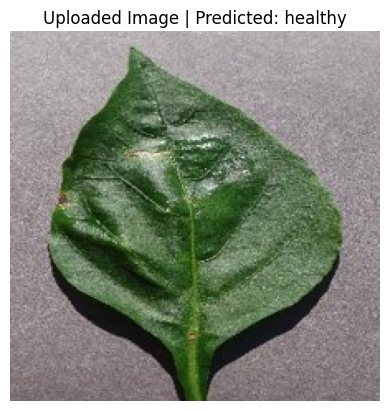

Predicted class for 0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG: healthy


In [ ]:
from google.colab import files
from PIL import Image
import io
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("Please upload your image file(s) below:")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



# Check if an image was uploaded in the previous step
if 'uploaded' not in globals() or not uploaded:
  print("No file uploaded. Please run the previous cell to upload an image first.")
else:
  # Process the most recently uploaded file (or the first one if multiple)
  filename = list(uploaded.keys())[0]
  img_bytes = uploaded[filename]
  img = Image.open(io.BytesIO(img_bytes))

  # Preprocess the image for the model
  # Resize to 224x224 (as per model input_shape) and convert to numpy array
  img_resized = img.resize((224, 224))
  img_array = np.array(img_resized)

  # Add batch dimension (1, 224, 224, 3)
  preprocessed_img = np.expand_dims(img_array, axis=0)

  # Make prediction using the Keras image classification 'model'
  # Ensure 'model' variable refers to the Keras model, not LinearRegression
  if 'model' in globals() and isinstance(model, tf.keras.Sequential):
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Display the image and prediction
    plt.imshow(img_resized)
    plt.title(f"Uploaded Image | Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
    print(f"Predicted class for {filename}: {predicted_class}")
  else:
    print("Error: Keras image classification 'model' not found or incorrectly defined. Please ensure the model definition cell has been run.")

In [ ]:
pip install gradio

In [ ]:
model.save("leaf_model.h5")

In [ ]:
model = tf.keras.models.load_model("leaf_model.h5")

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Define the predict_image function for Gradio
def predict_image(img):
    # Preprocess the image for the model
    # Resize to 224x224 (as per model input_shape) and convert to numpy array
    img_resized = img.resize((224, 224))
    img_array = np.array(img_resized)

    # Add batch dimension (1, 224, 224, 3)
    preprocessed_img = np.expand_dims(img_array, axis=0)

    # Make prediction using the Keras model
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    return predicted_class

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs=gr.Label(num_top_classes=2, label="Prediction"),
    title="Plant Disease Classifier 🌿",
    description="Upload a leaf image and get prediction whether it’s healthy or infected.",
    examples=None  # you can optionally provide sample images here
)

# -------------------------
# 4️⃣ Launch app
# -------------------------
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://67ef9aa8eb9a081ce4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd

# Define the file path to your crop yield dataset in Google Drive
file_path = '/content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage/crop_yield.csv'
file_path = '/content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage/state_weather_data_1997_2020.csv'
file_path = '/content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage/state_soil_data.csv'

 # Assuming crop_yield.csv is in MyDrive

# Load the CSV file into a pandas DataFrame
crop_df = pd.read_csv(file_path)

# Display the first 5 rows of the crop_df DataFrame
print("First 5 rows of the DataFrame:")
print(crop_df.head())

# Print the information about the DataFrame
print("\nDataFrame Info:")
crop_df.info()

First 5 rows of the DataFrame:
               state   N   P   K   pH
0     Andhra Pradesh  78  45  22  6.8
1  Arunachal Pradesh  55  15  35  5.5
2              Assam  60  18  38  5.8
3              Bihar  85  30  25  7.2
4       Chhattisgarh  70  35  20  6.5

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   30 non-null     object 
 1   N       30 non-null     int64  
 2   P       30 non-null     int64  
 3   K       30 non-null     int64  
 4   pH      30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


In [ ]:
print("Missing values before preprocessing:")
print(crop_df.isnull().sum())

Missing values before preprocessing:
state    0
N        0
P        0
K        0
pH       0
dtype: int64


In [ ]:
# Make predictions on the augmented test set
y_pred_aug = rf_model_augmented.predict(X_test_aug)

# Create a DataFrame to compare actual and predicted values
predictions_df = pd.DataFrame({'Actual Yield': y_test_aug, 'Predicted Yield': y_pred_aug})

# Display the first few comparisons
print("First 10 Actual vs. Predicted Yields:")
print(predictions_df.head(10))

First 10 Actual vs. Predicted Yields:
       Actual Yield  Predicted Yield
18238     -0.086685        -0.086342
6918      -0.089446        -0.089525
4894      -0.083608        -0.083560
10960     -0.090109        -0.089937
15615     -0.090456        -0.090378
17454     -0.090627        -0.090621
10480     -0.090181        -0.090133
16231     -0.088944        -0.088844
326       -0.005283        -0.006857
2498      -0.089013        -0.088755


**Reasoning**:
I will separate the features and target variable, then split the data into training and testing sets, import and initialize a RandomForestRegressor, and finally train the model, encapsulating all these steps in a single code block.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Separate features (X) and target variable (y)
X = crop_df_encoded.drop('yield', axis=1)
y = crop_df_encoded['yield']

# 2. Split the dataset into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Import RandomForestRegressor (already imported above)

# 4. Initialize a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# 5. Train the RandomForestRegressor model
rf_model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

RandomForestRegressor model trained successfully.
X_train shape: (15751, 97)
y_train shape: (15751,)
X_test shape: (3938, 97)
y_test shape: (3938,)


**Reasoning**:
I will make predictions on the test set using the trained RandomForestRegressor model, then calculate and print the R-squared score and Root Mean Squared Error (RMSE) to evaluate the model's performance.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1. Use the trained rf_model to make predictions on the test features X_test
y_pred = rf_model.predict(X_test)

# 3. Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# 4. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 5. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 6. Print the calculated R-squared score and RMSE
print(f"Model Performance Evaluation:")
print(f"R-squared (R2 Score): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Performance Evaluation:
R-squared (R2 Score): 0.9885
Mean Squared Error (MSE): 0.0120
Root Mean Squared Error (RMSE): 0.1095


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Add a new column named `health_status` to the `crop_df_encoded` DataFrame
crop_df_encoded['health_status'] = np.random.randint(0, 2, size=len(crop_df_encoded))

print("DataFrame with new 'health_status' column (first 5 rows):")
print(crop_df_encoded.head())
print(f"\nValue counts for 'health_status':\n{crop_df_encoded['health_status'].value_counts()}\n")

# 2. Redefine the features (X) to include the new `health_status` column and the target variable (y)
X_augmented = crop_df_encoded.drop('yield', axis=1)
y_augmented = crop_df_encoded['yield']

# 3. Split the augmented dataset into training and testing sets (80/20 ratio)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# 4. Initialize a new RandomForestRegressor model
rf_model_augmented = RandomForestRegressor(random_state=42)

# 5. Train this new RandomForestRegressor model
rf_model_augmented.fit(X_train_aug, y_train_aug)

print("RandomForestRegressor model trained successfully with augmented data.")

# 6. Evaluate the performance of this newly trained model
y_pred_aug = rf_model_augmented.predict(X_test_aug)

r2_aug = r2_score(y_test_aug, y_pred_aug)
mse_aug = mean_squared_error(y_test_aug, y_pred_aug)
rmse_aug = np.sqrt(mse_aug)

print(f"\nAugmented Model Performance Evaluation:")
print(f"R-squared (R2 Score): {r2_aug:.4f}")
print(f"Mean Squared Error (MSE): {mse_aug:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_aug:.4f}")

DataFrame with new 'health_status' column (first 5 rows):
       year      area  production  fertilizer  pesticide     yield  \
0 -1.866375 -0.144802   -0.062267   -0.179880  -0.121745 -0.090128   
1 -1.866375 -0.236473   -0.062464   -0.247217  -0.219385 -0.090225   
2 -1.866375 -0.244443   -0.062482   -0.253072  -0.227875 -0.090763   
3 -1.866375 -0.218707    0.419954   -0.234167  -0.200462  5.872928   
4 -1.866375 -0.243157   -0.062479   -0.252127  -0.226504 -0.090555   

   crop_Arecanut  crop_Arhar/Tur  crop_Bajra  crop_Banana  ...  \
0            1.0             0.0         0.0          0.0  ...   
1            0.0             1.0         0.0          0.0  ...   
2            0.0             0.0         0.0          0.0  ...   
3            0.0             0.0         0.0          0.0  ...   
4            0.0             0.0         0.0          0.0  ...   

   state_Puducherry  state_Punjab  state_Sikkim  state_Tamil Nadu  \
0               0.0           0.0           0.0        

In [ ]:
import pandas as pd

# Define the file path to your crop yield dataset in Google Drive
file_path = '/content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage/crop_yield.csv'

# Load the CSV file into a pandas DataFrame
crop_df = pd.read_csv(file_path)

# Display the first 5 rows of the crop_df DataFrame
print("First 5 rows of the DataFrame:")
print(crop_df.head())

# Print the information about the DataFrame
print("\nDataFrame Info:")
crop_df.info()

First 5 rows of the DataFrame:
           crop  year       season  state     area  production  fertilizer  \
0      Arecanut  1997  Whole Year   Assam  73814.0       56708  7024878.38   
1     Arhar/Tur  1997  Kharif       Assam   6637.0        4685   631643.29   
2   Castor seed  1997  Kharif       Assam    796.0          22    75755.32   
3      Coconut   1997  Whole Year   Assam  19656.0   126905000  1870661.52   
4  Cotton(lint)  1997  Kharif       Assam   1739.0         794   165500.63   

   pesticide        yield  
0   22882.34     0.796087  
1    2057.47     0.710435  
2     246.76     0.238333  
3    6093.36  5238.051739  
4     539.09     0.420909  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   crop        19689 non-null  object 
 1   year        19689 non-null  int64  
 2   season      19689 non-null  object 
 3

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define categorical and numerical features for preprocessing from the correctly loaded crop_df
categorical_features = ['crop', 'season', 'state']
numerical_features = ['year', 'area', 'production', 'fertilizer', 'pesticide', 'yield'] # 'yield' will be the target but scaled for consistency first

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(crop_df[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns and concatenate the encoded features
crop_df_encoded = pd.concat([crop_df.drop(columns=categorical_features), encoded_df], axis=1)

print("DataFrame after One-Hot Encoding (first 5 rows):")
print(crop_df_encoded.head())
print("\nInfo of DataFrame after One-Hot Encoding:")
crop_df_encoded.info()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features in the encoded DataFrame
crop_df_encoded[numerical_features] = scaler.fit_transform(crop_df_encoded[numerical_features])

print("\nDataFrame after scaling numerical features (first 5 rows):")
print(crop_df_encoded.head())
print("\nInfo of DataFrame after scaling numerical features:")
crop_df_encoded.info()

DataFrame after One-Hot Encoding (first 5 rows):
   year     area  production  fertilizer  pesticide        yield  \
0  1997  73814.0       56708  7024878.38   22882.34     0.796087   
1  1997   6637.0        4685   631643.29    2057.47     0.710435   
2  1997    796.0          22    75755.32     246.76     0.238333   
3  1997  19656.0   126905000  1870661.52    6093.36  5238.051739   
4  1997   1739.0         794   165500.63     539.09     0.420909   

   crop_Arecanut  crop_Arhar/Tur  crop_Bajra  crop_Banana  ...  state_Odisha  \
0            1.0             0.0         0.0          0.0  ...           0.0   
1            0.0             1.0         0.0          0.0  ...           0.0   
2            0.0             0.0         0.0          0.0  ...           0.0   
3            0.0             0.0         0.0          0.0  ...           0.0   
4            0.0             0.0         0.0          0.0  ...           0.0   

   state_Puducherry  state_Punjab  state_Sikkim  state_Tamil 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Add a new column named `health_status` to the `crop_df_encoded` DataFrame
crop_df_encoded['health_status'] = np.random.randint(0, 2, size=len(crop_df_encoded))

print("DataFrame with new 'health_status' column (first 5 rows):")
print(crop_df_encoded.head())
print(f"\nValue counts for 'health_status':\n{crop_df_encoded['health_status'].value_counts()}\n")

# 2. Redefine the features (X) to include the new `health_status` column and the target variable (y)
X_augmented = crop_df_encoded.drop('yield', axis=1)
y_augmented = crop_df_encoded['yield']

# 3. Split the augmented dataset into training and testing sets (80/20 ratio)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# 4. Initialize a new RandomForestRegressor model
rf_model_augmented = RandomForestRegressor(random_state=42)

# 5. Train this new RandomForestRegressor model
rf_model_augmented.fit(X_train_aug, y_train_aug)

print("RandomForestRegressor model trained successfully with augmented data.")

# 6. Evaluate the performance of this newly trained model
y_pred_aug = rf_model_augmented.predict(X_test_aug)

r2_aug = r2_score(y_test_aug, y_pred_aug)
mse_aug = mean_squared_error(y_test_aug, y_pred_aug)
rmse_aug = np.sqrt(mse_aug)

print(f"\nAugmented Model Performance Evaluation:")
print(f"R-squared (R2 Score): {r2_aug:.4f}")
print(f"Mean Squared Error (MSE): {mse_aug:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_aug:.4f}")

DataFrame with new 'health_status' column (first 5 rows):
       year      area  production  fertilizer  pesticide     yield  \
0 -1.866375 -0.144802   -0.062267   -0.179880  -0.121745 -0.090128   
1 -1.866375 -0.236473   -0.062464   -0.247217  -0.219385 -0.090225   
2 -1.866375 -0.244443   -0.062482   -0.253072  -0.227875 -0.090763   
3 -1.866375 -0.218707    0.419954   -0.234167  -0.200462  5.872928   
4 -1.866375 -0.243157   -0.062479   -0.252127  -0.226504 -0.090555   

   crop_Arecanut  crop_Arhar/Tur  crop_Bajra  crop_Banana  ...  \
0            1.0             0.0         0.0          0.0  ...   
1            0.0             1.0         0.0          0.0  ...   
2            0.0             0.0         0.0          0.0  ...   
3            0.0             0.0         0.0          0.0  ...   
4            0.0             0.0         0.0          0.0  ...   

   state_Puducherry  state_Punjab  state_Sikkim  state_Tamil Nadu  \
0               0.0           0.0           0.0        

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# --- Step 1: Correct Data Loading --- (Already executed in previous cells)
# Re-define file_path to specifically load crop_yield.csv
file_path = '/content/drive/MyDrive/PlantVillage/PlantVillage/PlantVillage/crop_yield.csv'
crop_df = pd.read_csv(file_path)

# --- Step 2: Re-run Preprocessing --- (Already executed in previous cells)
# Define categorical and numerical features for preprocessing
categorical_features = ['crop', 'season', 'state']
numerical_features = ['year', 'area', 'production', 'fertilizer', 'pesticide', 'yield'] # 'yield' will be target

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(crop_df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
crop_df_encoded = pd.concat([crop_df.drop(columns=categorical_features), encoded_df], axis=1)

# Scaling Numerical Features
scaler = StandardScaler()
crop_df_encoded[numerical_features] = scaler.fit_transform(crop_df_encoded[numerical_features])

# --- Step 3: Re-run Model Training with augmented data --- (Already executed in previous cells)
# Add a new column named `health_status` to the `crop_df_encoded` DataFrame
crop_df_encoded['health_status'] = np.random.randint(0, 2, size=len(crop_df_encoded))

# Redefine features (X_augmented) and target (y_augmented)
X_augmented = crop_df_encoded.drop('yield', axis=1)
y_augmented = crop_df_encoded['yield']

# Split the augmented dataset into training and testing sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# Initialize and train a new RandomForestRegressor model
rf_model_augmented = RandomForestRegressor(random_state=42)
rf_model_augmented.fit(X_train_aug, y_train_aug)

# --- Step 4 & 5: Implement Gradio Interface ---
# Ensure 'model' (TensorFlow leaf classifier) and 'class_names' are loaded from previous cells.
# 'model' was loaded in cell UtBWqjPHdYfK and 'class_names' in pjuY9_acuVIR.
# Assuming these global variables are accessible.
# If not, they would need to be reloaded here:
# model = tf.keras.models.load_model("leaf_model.h5")
# class_names = ['healthy', 'infected'] # Make sure this matches your model's class order

# Extract categories for Gradio dropdowns from the fitted encoder
all_crops = encoder.categories_[0].tolist()
all_seasons = encoder.categories_[1].tolist()
all_states = encoder.categories_[2].tolist()

# Define the combined prediction function for Gradio
def predict_combined_gradio(leaf_image, year, area, production, fertilizer, pesticide, crop_type, season, state):
    # 1. Leaf Health Prediction using the TensorFlow model
    img_resized = leaf_image.resize((224, 224))
    img_array = np.array(img_resized)
    preprocessed_img = np.expand_dims(img_array, axis=0)

    # Make prediction using the Keras image classification 'model'
    leaf_predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(leaf_predictions)
    leaf_health_status_str = class_names[predicted_class_index] # e.g., 'healthy' or 'infected'

    # Convert 'healthy'/'infected' to numerical 1/0 for crop yield model
    health_status_numerical = 1 if leaf_health_status_str == 'healthy' else 0 # 1 for healthy, 0 for infected

    # 2. Crop Yield Prediction using the RandomForestRegressor model
    # Define a consistent order for numerical and categorical features as used during training
    numerical_features_for_scaler_input = ['year', 'area', 'production', 'fertilizer', 'pesticide']
    categorical_features_for_encoder_input = ['crop', 'season', 'state']

    # Create a temporary DataFrame for the user's input values
    temp_user_data = pd.DataFrame({
        'year': [year],
        'area': [area],
        'production': [production],
        'fertilizer': [fertilizer],
        'pesticide': [pesticide],
        'crop': [crop_type],
        'season': [season],
        'state': [state]
    })

    # Scale the numerical features from user input
    # We need to make sure the order of columns matches what the scaler was fitted on
    # The scaler was fitted on ['year', 'area', 'production', 'fertilizer', 'pesticide', 'yield']
    # We only have 5 numerical inputs, so we create a dummy DataFrame to transform just these 5.
    # However, for inverse transform, we need the full list.

    # Create a dummy dataframe with the same columns as the original numerical_features to use the scaler correctly
    dummy_df_for_scaling_input = pd.DataFrame(columns=numerical_features) # ['year', 'area', 'production', 'fertilizer', 'pesticide', 'yield']
    for col in numerical_features_for_scaler_input:
        dummy_df_for_scaling_input[col] = temp_user_data[col]
    dummy_df_for_scaling_input['yield'] = 0 # Placeholder for yield, it will be ignored during prediction but needed for scaler input shape

    scaled_numerical_values = scaler.transform(dummy_df_for_scaling_input)[0, :5] # Take only the 5 actual inputs

    # One-hot encode the categorical features from user input
    encoded_categorical_values = encoder.transform(temp_user_data[categorical_features_for_encoder_input])

    # Create a DataFrame for the final input to rf_model_augmented
    # Initialize with zeros, ensuring all columns from X_augmented.columns are present
    model_input_df = pd.DataFrame(0, index=[0], columns=X_augmented.columns)

    # Populate scaled numerical features
    for i, col_name in enumerate(numerical_features_for_scaler_input):
        model_input_df[col_name] = scaled_numerical_values[i]

    # Populate one-hot encoded categorical features
    encoded_feature_names = encoder.get_feature_names_out(categorical_features_for_encoder_input)
    for i, col_name in enumerate(encoded_feature_names):
        if col_name in model_input_df.columns: # Ensure the column exists in our target features
            model_input_df[col_name] = encoded_categorical_values[0, i]

    # Add the health_status feature (derived from leaf image prediction)
    if 'health_status' in model_input_df.columns:
        model_input_df['health_status'] = health_status_numerical

    # Make the crop yield prediction (returns a scaled yield)
    predicted_yield_scaled = rf_model_augmented.predict(model_input_df)[0]

    # Inverse transform the predicted yield to its original scale
    # Create a dummy array matching the scaler's original numerical_features shape
    dummy_array_for_inverse_transform = np.zeros((1, len(numerical_features)))
    yield_col_index_in_scaler_fit = numerical_features.index('yield')
    dummy_array_for_inverse_transform[0, yield_col_index_in_scaler_fit] = predicted_yield_scaled

    original_scale_predicted_yield = scaler.inverse_transform(dummy_array_for_inverse_transform)[0, yield_col_index_in_scaler_fit]

    return leaf_health_status_str, f"{original_scale_predicted_yield:.2f} units" # Return rounded yield

# Create Gradio interface components
image_input = gr.Image(type="pil", label="Upload Leaf Image")

# Numerical inputs
year_input = gr.Slider(minimum=int(crop_df['year'].min()), maximum=int(crop_df['year'].max()), step=1, value=int(crop_df['year'].mean()), label="Year")
area_input = gr.Number(label="Area (Hectares)", value=float(crop_df['area'].mean()))
production_input = gr.Number(label="Production (Tons)", value=float(crop_df['production'].mean()))
fertilizer_input = gr.Number(label="Fertilizer (kg)", value=float(crop_df['fertilizer'].mean()))
pesticide_input = gr.Number(label="Pesticide (kg)", value=float(crop_df['pesticide'].mean()))

# Categorical inputs (dropdowns from extracted categories)
crop_type_input = gr.Dropdown(all_crops, label="Crop Type", value=all_crops[0] if all_crops else None)
season_input = gr.Dropdown(all_seasons, label="Season", value=all_seasons[0] if all_seasons else None)
state_input = gr.Dropdown(all_states, label="State", value=all_states[0] if all_states else None)

# Outputs
leaf_output = gr.Label(label="Leaf Health Status")
yield_output = gr.Textbox(label="Predicted Crop Yield")

# Create the Gradio Interface
integrated_interface = gr.Interface(
    fn=predict_combined_gradio,
    inputs=[
        image_input,
        year_input,
        area_input,
        production_input,
        fertilizer_input,
        pesticide_input,
        crop_type_input,
        season_input,
        state_input
    ],
    outputs=[leaf_output, yield_output],
    title="Integrated Crop Yield Predictor with Leaf Health Analysis", # Removed emoji
    description="Upload a leaf image to determine its health, then input crop and environmental factors to predict crop yield.",
    live=False
)

# --- Step 6: Launch Gradio Interface ---
integrated_interface.launch(share=True)